In [2]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

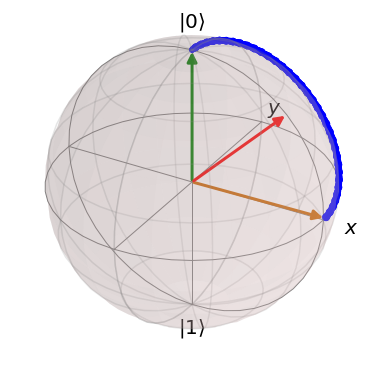

In [5]:
Omega = (np.pi)*1.0e6
delta = np.pi*1.0e6

W1 = np.array([Omega, 0.0, delta]) #first pulse
W2 = np.array([0.0, 0.0, delta])   #free evolution
W3 = W1                            #second pulse

dt = 1.0e-10
t1s = np.arange(0.0, 0.7e-6, dt)           #time steps for the first pulse
t2s = np.arange(0.0, 1.0e-6, dt)           #time steps for the free evolution
t3s = np.arange(0.0, 0.7e-6, dt)           #time steps for the second pulse

R1s = np.array([[0.0]*3]*np.size(t1s))     #Bloch vectors for all time steps during first pulse
R2s = np.array([[0.0]*3]*np.size(t2s))     #Bloch vectors for all time steps during free evolution
R3s = np.array([[0.0]*3]*np.size(t3s))     #Bloch vectors for all time steps during second pulse

rho22s = [0.0]*(np.size(t1s)+np.size(t2s)+np.size(t3s)) #excited state population throughout interogation

b = Bloch()
b.view = [-150, 30]
#b.view = [-90, 63.4349488 ]
b.point_color = ['b']
b.point_marker = ['o']
b.vector_color = ['g', '#CC6600', 'r', 'b']

R1s[0] = np.array([0.0, 0.0, 1.0])    #initialize Bloch vector in ground state

for ii in range(np.size(t1s)-1):
    Rdot = np.cross(R1s[ii],W1)      
    R1s[ii+1] = R1s[ii] + Rdot*dt     #integrate
    rho22s[ii+1] = (1.0-R1s[ii+1][2])/2.0
    if ii%50 == 0:
        b.add_points(R1s[ii+1])       #add an intermediate pt to the Bloch sphere
        
b.add_vectors(R1s[0])                 #initial state vector
b.add_vectors(R1s[np.size(t1s)-1])    #final state vector
b.add_vectors(W1/np.linalg.norm(W1))  #W vector
b.show()

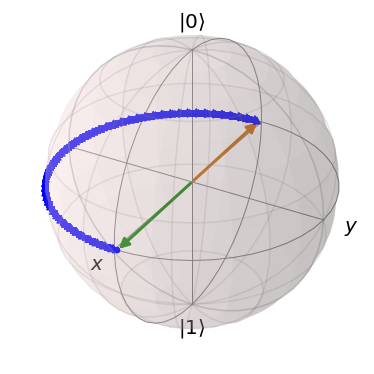

In [6]:
R2s[0] = R1s[np.size(t1s)-1]

b = Bloch()
b.view = [-60, 30]
#b.view = [-90, 90]
b.point_color = ['b']
b.vector_color = ['g', '#CC6600', 'r', 'b']
for ii in range(np.size(t2s)-1):
    Rdot = np.cross(R2s[ii],W2)
    R2s[ii+1] = R2s[ii] + Rdot*dt
    rho22s[ii+1+np.size(t1s)] = (1.0-R2s[ii+1][2])/2.0
    if ii%50 == 0:
        b.add_points(R2s[ii+1])
        
b.add_vectors(R2s[0])
b.add_vectors(R2s[np.size(t2s)-1])
b.show()

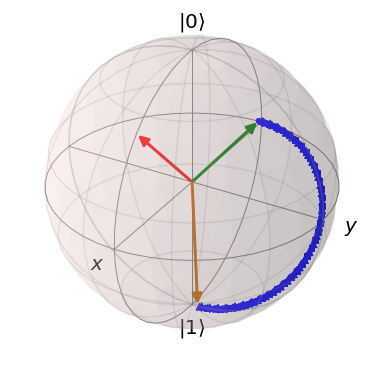

In [7]:
R3s[0] = R2s[np.size(t2s)-1]

b = Bloch()
b.view = [-60, 30]
#b.view = [-90, 63.4349488 ]
b.point_color = ['b']
b.vector_color = ['g', '#CC6600', 'r', 'b']
for ii in range(np.size(t3s)-1):
    Rdot = np.cross(R3s[ii],W3)
    R3s[ii+1] = R3s[ii] + Rdot*dt
    rho22s[ii+1+np.size(t1s)+np.size(t2s)] = (1.0-R3s[ii+1][2])/2.0
    if ii%50 == 0:
        b.add_points(R3s[ii+1])
        
b.add_vectors(R3s[0])
b.add_vectors(R3s[np.size(t3s)-1])
b.add_vectors(W1/np.linalg.norm(W1))
b.show()

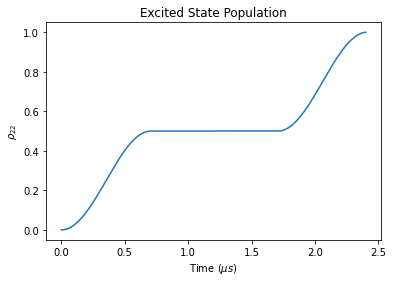

In [8]:
rho22s[np.size(t1s)] = rho22s[np.size(t1s)-1]
rho22s[np.size(t1s) + np.size(t2s)] = rho22s[np.size(t1s)+ np.size(t2s)-1]
ts = np.arange(0.0, 2.4e-6, dt)
plt.plot(ts*1e6,rho22s)
plt.title("Excited State Population")
plt.ylabel(r'$\rho_{22}$')
plt.xlabel(r'Time $(\mu s)$')
plt.show()